<a href="https://colab.research.google.com/github/lkw0820/big_data_final/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

날짜별 온도별로 모기 밀집도 보여주기
애니매이션 넣어서

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

연중주수를 입력해주세요(14주~44주): 33주


Text(0, 0.5, '밀집도')

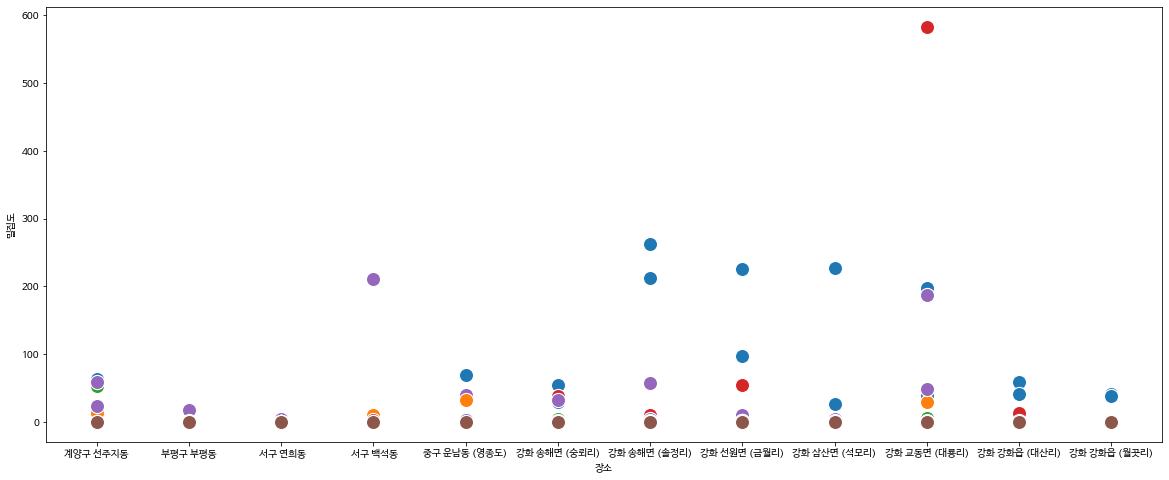

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('/content/인천광역시_보건환경연구원-모기밀도조사_20211231.csv', encoding = 'CP949', header=0)
Text=input('연중주수를 입력해주세요(14주~44주): ')
#정렬

dfd=df.groupby(['연중주수'])
df4=dfd.get_group(Text)

name=list(df4.columns.values)[4:] #모기 종류

fig, ax = plt.subplots(figsize=(20,8))
for i in name:
  sns.scatterplot(data=df4, x='장소',y=i, s=200)

ax.set_ylabel('밀집도')

데이터 가공화 + 모기 종류 별 밀집도 애니메이션 그래프

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
plt.rc('font', family='NanumBarunGothic') 

df = pd.read_csv('/content/인천광역시_보건환경연구원-모기밀도조사_20211231.csv', encoding = 'CP949', header=0)
df1 = pd.read_csv('/content/인천ta_20221201172941.csv', encoding = 'CP949', header=0)
df2 = pd.read_csv('/content/강화ta_20221204010051.csv', encoding = 'CP949', header=0)

print('모기 종류: 얼룩날개모기류, 이나토미집모기, 반점날개집모기, 동양집모기, 빨간집모기, 작은빨간집모기')
print('           줄다리집모기, 노랑늪모기,반점날개늪모기, 흰줄숲모기, 금빛숲모기, 한국숲모기, 토고숲모기')
print('           등줄숲모기, 큰검정들모기, 금빛어깨숲모기기')
Text1 = input("모기 종류를 입력하세요: ")
Text2 = int(input("밀집도를 예측하고 싶은 온도를 입력하세요: "))

df['온도']=0
for i in np.arange(0,31): #30은 4월부터 10월까지 30주
  df['온도'].iloc[12*i:(12*i)+5] = df1['평균기온(℃)'].iloc[7*i:7*(i+1)].mean() #인천지역에 평균 온도
  df['온도'].iloc[5+(12*i):12+(12*i)] = df2['평균기온(℃)'].iloc[7*i:7*(i+1)].mean()#강화지역에 평균 온도

fig = px.scatter(df, x='장소', y='온도', animation_frame='연중주수',range_y=[df['온도'].min(),df['온도'].max()], size=Text1)

fig.show()

모기 종류: 얼룩날개모기류, 이나토미집모기, 반점날개집모기, 동양집모기, 빨간집모기, 작은빨간집모기
           줄다리집모기, 노랑늪모기,반점날개늪모기, 흰줄숲모기, 금빛숲모기, 한국숲모기, 토고숲모기
           등줄숲모기, 큰검정들모기, 금빛어깨숲모기기
모기 종류를 입력하세요: 빨간집모기
밀집도를 예측하고 싶은 온도를 입력하세요: 26


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
df.info() #df의 정보
df.dtypes #df의 타입
df.head() #df의 데이터확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월        371 non-null    int64  
 1   주        371 non-null    object 
 2   연중주수     371 non-null    object 
 3   장소       371 non-null    object 
 4   얼룩날개모기류  371 non-null    int64  
 5   이나토미집모기  371 non-null    int64  
 6   반점날개집모기  371 non-null    int64  
 7   동양집모기    371 non-null    int64  
 8   빨간집모기    371 non-null    int64  
 9   작은빨간집모기  371 non-null    int64  
 10  줄다리집모기   371 non-null    int64  
 11  노랑늪모기    371 non-null    int64  
 12  반점날개늪모기  371 non-null    int64  
 13  흰줄숲모기    371 non-null    int64  
 14  금빛숲모기    371 non-null    int64  
 15  한국숲모기    371 non-null    int64  
 16  토고숲모기    371 non-null    int64  
 17  등줄숲모기    371 non-null    int64  
 18  큰검정들모기   371 non-null    int64  
 19  금빛어깨숲모기  371 non-null    int64  
 20  온도       371 non-null    float64
dtypes: float64(1), i

,월,주,연중주수,장소,얼룩날개모기류,이나토미집모기,반점날개집모기,동양집모기,빨간집모기,작은빨간집모기,...,노랑늪모기,반점날개늪모기,흰줄숲모기,금빛숲모기,한국숲모기,토고숲모기,등줄숲모기,큰검정들모기,금빛어깨숲모기,온도
0,4,1주,14주,계양구 선주지동,0,0,0,0,16,0,...,0,0,0,0,0,0,0,0,0,13.6
1,4,1주,14주,부평구 부평동,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,13.6
2,4,1주,14주,서구 연희동,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,13.6
3,4,1주,14주,서구 백석동,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,13.6
4,4,1주,14주,중구 운남동 (영종도),1,0,0,0,15,0,...,0,0,0,0,0,0,0,0,0,13.6


온도에 따른 모기 밀집도 예측 지역, 모기 종류에 따른 값을 x값으로 넣고 온도 값을 넣어서 학습 다음에는 테스트 학습셋 사용-> 교차 검증을 통해 예측값 정확하게 만든다

빨간집모기
계양구 선주지동, 부평구 부평동, 서구 연희동, 서구 백석동, 중구 운남동(영종도)
강화 송해면(숭뢰리), 강화 송해면(솔정리), 강화 선원면(금월리), 강화 삼산면(석모리)
강화 교동면(대룡리), 강화 강화읍(대산리), 강화 강화읍(월곳리)
지역을 입력하세요: 계양구 선주지동
선형 회귀모델:  26 ℃ 일때 밀집도 예측:  [78.18490953]


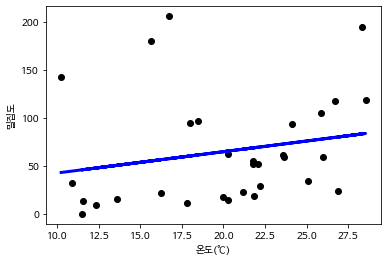

In [ ]:
import tensorflow as tf
from sklearn import linear_model

reg = linear_model.LinearRegression()
print(Text1)
print("계양구 선주지동, 부평구 부평동, 서구 연희동, 서구 백석동, 중구 운남동(영종도)")
print("강화 송해면(숭뢰리), 강화 송해면(솔정리), 강화 선원면(금월리), 강화 삼산면(석모리)")
print("강화 교동면(대룡리), 강화 강화읍(대산리), 강화 강화읍(월곳리)")
Text3 = input("지역을 입력하세요: ")
#y= 밀집도 x = 온도
grouped=df.groupby(['장소'])
g1=grouped.get_group(Text3)[Text1]
g2=grouped.get_group(Text3)['온도']
x=np.array(g2).reshape(31,1) #온도
y=np.array(g1) #밀집도

#학습
reg.fit(x,y)
#예측값
print('선형 회귀모델: ',Text2, '℃ 일때 밀집도 예측: ',reg.predict([[Text2]]))

# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(x, y, color='black')
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(x)

# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(x, y_pred, color='blue', linewidth=3)		
plt.show()

학습셋과 테스트셋 사용

빨간집모기
선형 회귀모델, 학습셋 테스트셋 사용용:  26 ℃ 일때 밀집도 예측:  [75.94620628]


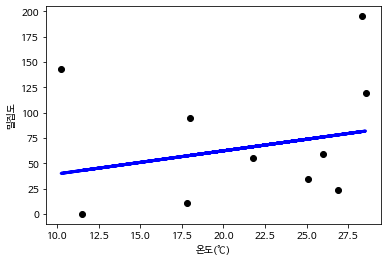

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import train_test_split

reg = linear_model.LinearRegression()
print(Text1)

#x= 온도 y = 밀집도
grouped=df.groupby(['장소'])
g1=grouped.get_group(Text3)[Text1]
#.drop(['온도','월','주','연중주수', '장소'], axis=1)
g2=grouped.get_group(Text3)['온도']
y=np.array(g1)
x=np.array(g2).reshape(31,1)

#학습셋과 테스트셋 구분
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3)


#학습
reg.fit(X_train,Y_train)
#예측값
print('선형 회귀모델, 학습셋 테스트셋 사용용: ',Text2, '℃ 일때 밀집도 예측: ',reg.predict([[Text2]]))


# 학습 데이터와 y 값을 산포도로 그린다. 
plt.scatter(X_test, Y_test, color='black')
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')

# 학습 데이터를 입력으로 하여 예측값을 계산한다.
y_pred = reg.predict(X_test)

#학습 데이터와 예측값으로 선그래프로 그린다. 
#계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(X_test, y_pred, color='blue', linewidth=3)		
plt.show()


딥러닝, 교차검증 X

In [ ]:
print('교차검증 X')
#딥러닝모델
model1 = Sequential()
model1.add(Dense(2,input_dim=1,activation='relu'))
model1.add(Dense(1,activation='relu'))
model1.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X_train,Y_train, epochs=30, batch_size=1)


교차검증 X
Epoch 1/30
21/21 [==============================] - 0s 2ms/step - loss: 5573.9951 - accuracy: 0.0000e+00
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 5520.1494 - accuracy: 0.0000e+00
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 5467.5571 - accuracy: 0.0000e+00
Epoch 4/30
21/21 [==============================] - 0s 1ms/step - loss: 5414.4385 - accuracy: 0.0000e+00
Epoch 5/30
21/21 [==============================] - 0s 1ms/step - loss: 5357.4297 - accuracy: 0.0000e+00
Epoch 6/30
21/21 [==============================] - 0s 1ms/step - loss: 5300.5820 - accuracy: 0.0000e+00
Epoch 7/30
21/21 [==============================] - 0s 1ms/step - loss: 5245.1025 - accuracy: 0.0000e+00
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 5192.7568 - accuracy: 0.0000e+00
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 5129.9819 - accuracy: 0.0000e+00
Epoch 10/30
21/21 [=============================

딥러닝 사용, 교차검증 X, 학습셋 테스트셋으로 나눈것 그래프

1/1 [==============================] - 0s 36ms/step
딥러닝 모델, 교차검증X, 학습셋 테스트셋 나눔눔:  26 ℃ 일때 밀집도 예측:  [[35.623276]]
1/1 [==============================] - 0s 22ms/step


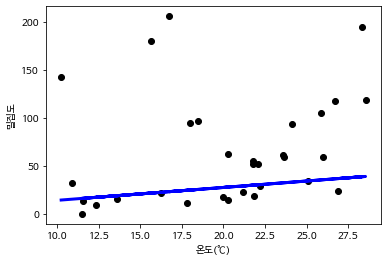

[[18.985723]
 [16.225576]
 [16.129738]
 [22.512577]
 [17.279799]
 [21.726704]
 [25.483568]
 [23.202614]
 [24.851034]
 [27.917866]
 [29.930473]
 [29.144596]
 [32.345604]
 [33.131474]
 [35.450768]
 [38.74761 ]
 [36.850006]
 [39.035122]
 [36.543324]
 [35.604107]
 [34.358208]
 [32.42227 ]
 [30.486336]
 [29.930473]
 [30.332993]
 [30.007143]
 [27.572845]
 [27.975368]
 [24.621021]
 [15.382198]
 [14.481316]]


In [ ]:
#예측값
print('딥러닝 모델, 교차검증X, 학습셋 테스트셋 나눔눔: ',Text2, '℃ 일때 밀집도 예측: ', model1.predict([[Text2]]))

y_pred = model1.predict(x)
plt.scatter(x, y, color='black')
# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')		
plt.show()


딥러닝, 교차검증 O

In [ ]:
from sklearn.model_selection import StratifiedKFold

print('교차검증 O')
skf = StratifiedKFold(n_splits=2, shuffle=True)
accuracy=[]
for train, test in skf.split(x,y):
  model2 = Sequential()
  model2.add(Dense(2,input_dim=1,activation='relu'))
  model2.add(Dense(1,activation='relu'))
  model2.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['accuracy'])

  model2.fit(x[train], y[train],  epochs=30, batch_size=1)
  k_accuracy = "%.4f"%(model2.evaluate(x[test],y[test])[1])
  accuracy.append(k_accuracy)


print('정확도: ',accuracy)

교차검증 O
Epoch 1/30


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=2.



15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 2/30
15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 0s 1ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 6/30
15/15 [==============================] - 0s 1ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 7/30
15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 8/30
15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 9/30
15/15 [==============================] - 0s 2ms/step - loss: 7814.3335 - accuracy: 0.0000e+00
Epoch 10/30
15/15 [==============================] - 0s 2ms/step -

딥러닝, 교차검증 후 예측값 표시

1/1 [==============================] - 0s 65ms/step
딥러닝모델, 교차검증 O, 테스트셋 학습셋 나눔:  26 ℃ 일때 밀집도 예측:  [[0.]]
1/1 [==============================] - 0s 48ms/step


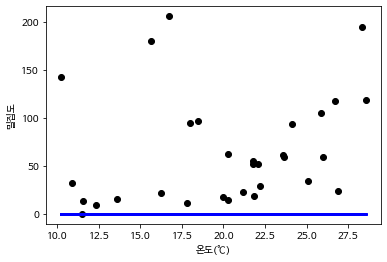

In [ ]:
#예측값
print('딥러닝모델, 교차검증 O, 테스트셋 학습셋 나눔: ',Text2, '℃ 일때 밀집도 예측: ',model2.predict([[Text2]]))
y_pred = model2.predict(x)
plt.scatter(x, y, color='black')
# 학습 데이터와 예측값으로 선그래프로 그린다. 
# 계산된 기울기와 y 절편을 가지는 직선이 그려진다. 
plt.plot(x, y_pred, color='blue', linewidth=3)		
plt.xlabel('온도(℃)')
plt.ylabel('밀집도')
plt.show()
